In [11]:
using Revise
#using Random, Distributions
using CSV
using DataFrames
using StatsBase
using CairoMakie

include("../src/main.jl")
import .SpectralStatistics as stats

In [2]:
folder = pwd() * "/data"
filename = "/kspectrum.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
k = df.Column1 #.^ 2

kspect = stats.RealSpectrum(k) 
spectrum = stats.unfold_spectrum(kspect,2)

Main.SpectralStatistics.UnfoldedSpectrum([1.0940642678826775, 1.9746928522493448, 2.880320718857711, 3.9394763632479393, 5.092025065238052, 6.357342801506681, 6.924048402791023, 7.8096086553106545, 9.288028581047826, 9.719471628384252  …  2.005970756175629e6, 2.0059711700619769e6, 2.0059716062732574e6, 2.00597423929405e6, 2.0059757933053342e6, 2.0059768705632407e6, 2.0059773683687563e6, 2.0059779242460164e6, 2.005979190869107e6, 2.0059806919083202e6])

In [3]:
folder = pwd() * "/data"
filename = "/unfolded_spectrum2.csv"
#names = [Symbol("e"), Symbol("ten")]
df = DataFrame(CSV.File(folder * filename, header=0) )
e = df.Column1

spectrum = stats.UnfoldedSpectrum(e) #unfolded spectrum Type


Main.SpectralStatistics.UnfoldedSpectrum([0.020088869907476454, 1.0494204378135181, 2.3443588189274003, 2.7007302715690384, 4.225299772199284, 4.954697313138514, 6.4385422292229695, 6.891930954946573, 7.798894957336686, 9.13404935933204  …  2.0010886788305254e6, 2.0010892571556424e6, 2.0010897350300865e6, 2.0010909726256414e6, 2.001091881786611e6, 2.0010930896167953e6, 2.0010942810629837e6, 2.0010952298994954e6, 2.0010957879009813e6, 2.0010970790590371e6])

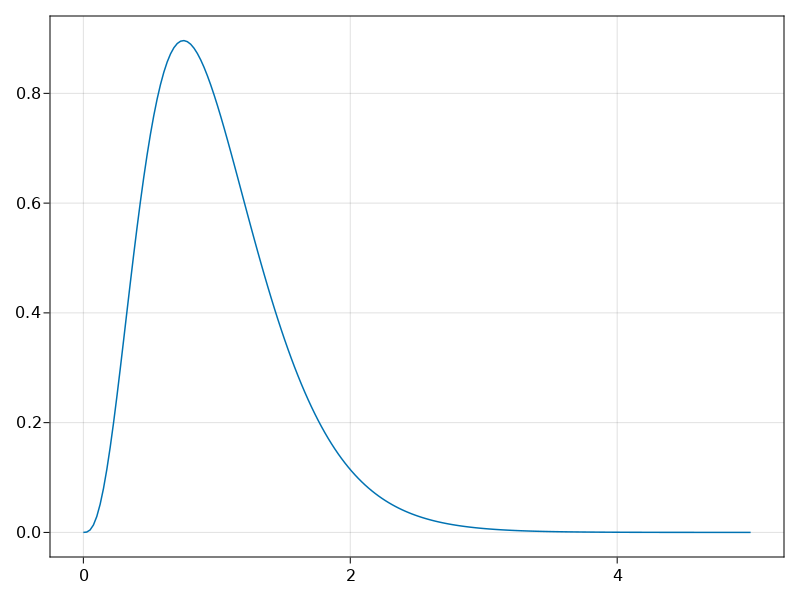

In [20]:
ga = stats.Gamma()
#semi_poison
sp(n) = 2*(n +1) - 1
n = 1 #order of level spacing n= 1 means nearest neighbour
g = sp(n)
min_s = 0.0
max_s = 5.0
grid = 200

var = collect(LinRange(min_s, max_s, grid))
#statistic = "level_spacing_pdf"

#x, res = stats.level_spacing_pdf(spectrum, var; n=n)
model_ga = stats.level_spacing_pdf(ga, var; g);

f, ax, l1 = lines(var, model_ga)
f